In [1]:
# Import required dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op

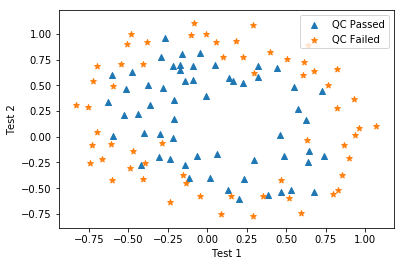

In [2]:
# Load and visualise data
data = pd.read_csv('Chips.csv')
#data = pd.read_csv('Logistic_eg1.csv')
#data = pd.read_csv('Logistic_eg2.csv')

QC_Passed_Mask = data.query('QC_OK==1')
QC_Failed_Mask = data.query('QC_OK==0')

plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.scatter(QC_Passed_Mask['Test 1'], QC_Passed_Mask['Test 2'], marker = '^', label = 'QC Passed')
plt.scatter(QC_Failed_Mask['Test 1'], QC_Failed_Mask['Test 2'], marker = '*', label = 'QC Failed')
plt.legend(loc = 1)

plt.show()

A function to create polynomial features. The same implementation can also be found in _sklearn.preprocessing.PolynomialFeatures_

In [3]:
def map_features(data, deg = 6):
    features = pd.DataFrame([1]*data.shape[0], columns=[0])
    ctr = 1
    for i in range(1, deg+1):
        for j in range(i+1):
            temp = data[:,0]**(i-j)*(data[:,1]**j)
            try:
                features[ctr] = temp.values
            except AttributeError:
                features[ctr] = temp
            ctr += 1
    return features

In [4]:
Y = np.array(data.QC_OK)
X = np.array(data.drop('QC_OK', axis = 1))
lam = 0
x = map_features(X)
initial_theta = np.zeros(x.shape[1])
initial_theta

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [5]:
def draw(X, theta, accuracy, lam):
    plt.scatter(QC_Passed_Mask['Test 1'], QC_Passed_Mask['Test 2'], marker = '^', label = 'QC Passed')
    plt.scatter(QC_Failed_Mask['Test 1'], QC_Failed_Mask['Test 2'], marker = '*', label = 'QC Failed')
    plt.legend(loc = 1)
    x1_min, x1_max = X[:,0].min(), X[:,0].max(),
    x2_min, x2_max = X[:,1].min(), X[:,1].max(),
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    h = sigmoid(mapF(np.c_[xx1.ravel(), xx2.ravel()]).dot(theta))
    h = h.values.reshape(xx1.shape)
    plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='g');       
    plt.title('Train accuracy {}% with Lambda = {}'.format(np.round(accuracy, decimals=2), lam))
    plt.show()

The sigmoid function is defined as:
$ \frac{1}{1-e^{-x}}$

In [6]:
def sigmoid(x):
    '''
    Your code here.
    '''
    return ans

Use the funtion below to test your sigmoid function.

In [ ]:
def draw_sigmoid():
    x = np.linspace(-10, 10)
    y = sigmoid(x)
    plt.plot(x, y)
    plt.show()
draw_sigmoid()

The regularized cost function for logistic regression is defined as:
$J(\theta) = \frac{1}{m} \sum_{i=1}^{m}[-y^{(i)}log*(h_\theta(x^{(i)})) - (1-y^{(i)})*log(1-h_\theta(x^{(i)}))] + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta^2_j$ and we already know, for logistic regression, $h_\theta(x) = \frac{1}{1-e^-{\theta^Tx}}$

In [7]:
def cost_function(theta, lam, X, y):
    '''
    Your code here.
    '''
    return cost

To calculate the gradient, the $\theta's$, we use the following formulae. Don't get intimidated. Use a vectorized notation and you'll realise it's not that hard after all!
$\frac{\delta{J}(\theta)}{\delta\theta_0} = \frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}$ for $j = 0$ <br><br>
$\frac{\delta{J}(\theta)}{\delta\theta_0} = (\frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}) + \frac{\lambda}{m}$ for $j >= 1$

In [8]:
def grad_calculate(theta, lam, X, y):
    '''
    Your code here.
    '''
    return theta

To predict, we use the hypothesis function $H_\theta(x) = \frac {1}{1 - e^{-\theta^TX}}$. This function gives us values between 0 and 1. Hence, we can choose our own threshold to decide if a particular set of values provide a positive output. The default threshold has been set to 0.5.

In [9]:
def predict(theta, x, threshold = 0.5):
    '''
    Your code here.
    '''
    return y

The last function we will write is a simple accuracy calculator. 

In [10]:
def find_accuracy(y_dash, y):
    '''
    Your code here.
    '''
    return accuracy

After playing around with a few values of theta, we will now let the pros handle the optimization. The function below uses the _Truncated Newton method_ to find the optimal values of theta.

In [ ]:
Result = op.minimize(fun = cost_function, x0 = initial_theta, args = (lam, x, Y), method = 'TNC', jac = grad_calculate)
theta = Result.x

Once we find the optimal theta values, let us use these values to predict the output using our dataset.

In [ ]:
y_dash = predict(theta, x)
accuracy = find_accuracy(y_dash, y)

draw(X, theta, accuracy, lam)